# Deep Learning Lab @ 2023
  ### Mohamed Ibn Khedher & Mounim A. El-Yacoubi
  ### DATAIA 901
  

# Introduction to Deep Learning
Classification of Handwritten Digits by a Convolutional Neural Network (CNN)
This study is carried out on MNIST, a dataset of handwritten numerals made up of 60000 images for training and 10000 for test. Each image has a size of 28x28 pixels, the gray level of each being between 0 and 255.

Reference paper:

@inproceedings{Lecun1998,
    Author = {Y. Lecun and L. Bottou and Y. Bengio and P. Haffner},
    title     = {Gradient-based learning applied to document recognition},
    booktitle = {Proceedings of the IEEE},
    year      = {1998},
}


# Demo:

*This* Lab contains 6 parts. The goal is to compelete the TO DO parts.

1. Data reading and splitting.
2. Data visualisation.
3. Define the model architecture
4. Model fitting
5. Model evaluation
6. Implement new model architecture from a text description
  * Implementation using defaut hyper parameters values
  * Optimization on the validation dataset: modify the hyper parameters like **batch_size**, **epochs**, **validation_split**, etc.,to optimize performance on the validation dataset.
  * After optimization, evaluate the final model on the test dataset.  



7. Interpret your obtained reults.

## Import the needed packages

In [9]:
#### First, you should import libraires.
####

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from IPython.display import Image
import sklearn
import sklearn.model_selection

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
### for the color
import termcolor


# I) Data reading and splitting

This part consists of reading the MNIST dataset, split it into train, valid and test sets and display the number of images per set.

In [10]:
# I - Data reading & splitting

from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

train_size = 0.7
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=train_size, stratify=y, random_state=2026)


train_size = 0.7
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_train, y_train, train_size=train_size, stratify=y_train, random_state=2026)



# Input image format
rows, cols, channels = 28,28,1

# 2) What does "x_train", "y_train", "x_test", "y_test", "x_valid" and "y_valid"  present ?
# 3) Reshape "x_train", "x_valid" and "x_test" according to the input image format

x_train = x_train.reshape(x_train.shape[0], rows, cols, channels)
x_test = x_test.reshape(x_test.shape[0], rows, cols, channels)
x_valid = x_valid.reshape(x_valid.shape[0], rows, cols, channels)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_test /= 255
x_valid /= 255

#4) Display the number of images in train, valid and test sets

print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')



34300 train samples
14700 valid samples
21000 test samples


# II) Data visualisation

Which library is required to visualise the images ?  
Complete the following commands to display the first 200 images from the training set.

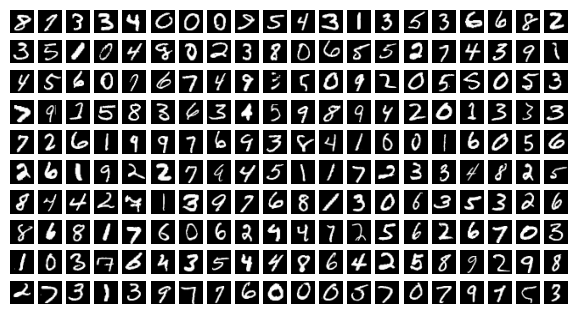

In [11]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')


# III) Model architetcure

In [12]:
#III - Model Architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#1) Describe each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command to show the model architecture

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

# IV) Fitting

### 1. First *Fitting/Evaluation* using a selected values of hyper parameters
* ####  Fitting on the training dataset
* #### Validation on the validation dataset
* #### Evaluation on the test dataset

In [13]:
# IV - Fitting
import tensorflow as tf
# 1) convert labels to categorical type

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# 2) complete the following command to fit the Deep neural model.
# 3) select the hyperparameters values according to your choice

with tf.device('/device:GPU:0'):
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# 4) What does each hyperparameter presents


Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.1286 - loss: 2.2838 - val_accuracy: 0.3177 - val_loss: 2.2382
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2121 - loss: 2.2341 - val_accuracy: 0.4804 - val_loss: 2.1788
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2964 - loss: 2.1817 - val_accuracy: 0.5756 - val_loss: 2.1124
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3676 - loss: 2.1199 - val_accuracy: 0.6485 - val_loss: 2.0363
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4357 - loss: 2.0471 - val_accuracy: 0.7044 - val_loss: 1.9481
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4794 - loss: 1.9652 - val_accuracy: 0.7456 - val_loss: 1.8465
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5300 - loss: 1.8670 - val_accuracy: 0.7698 - val_loss: 1.7328
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5501 - loss: 1.7706 - val_ac

# Model evaluation on the test dataset

1.   List item
2.   List item



In [15]:
# V - Evaluate the model

# 1) complete the command to evaluate the model

score = model.evaluate(x_test, y_test, verbose=0)

# 2) complete the command to display model performance

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2823331356048584
Test accuracy: 0.9180476069450378


**NB:** Modify hyper parameters like **batch_size**, **epochs**,

*   List item
*   List item

**validation_split**, etc., used so as to improve the results. Make
an analysis and interpretation in light of the new results

#### To analyze results, plot the confusion matrix using the following command

In [16]:
from sklearn.metrics import confusion_matrix
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
y_predict = model.predict(x_test)
y_test_labels = y_test.argmax(1)
y_predict_labels = y_predict.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict_labels))

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix
 [[2016    2    3    4    7    7   15    2   14    1]
 [   0 2307   15    6    4   12    5    2   10    2]
 [  14   13 1882   22   36    4   28   36   55    7]
 [  17   13   33 1922    4   54    8   34   42   15]
 [   2    9   11    3 1884    1   22    7    9   99]
 [  26   18    8   67   29 1641   32    2   52   19]
 [  16   20    2    1    9   37 1964    1   13    0]
 [   9   21   33    4   37    1    0 2013    6   64]
 [  18   57   12   68   16   63   20   11 1757   26]
 [  15   13   13   43   41    5    1   51   12 1893]]


# VI) New Model Architetcure & Evaluation

Now, It is time to create a new model and evaluate its performance on the MNIST dataset. We suggest to implement the following architecure.

## Create model

* Convolutional layer with 30 feature maps of size 5×5.
* Pooling layer taking the max over 2*2 patches.
* Convolutional layer with 15 feature maps of size 3×3.
* Pooling layer taking the max over 2*2 patches.
* Dropout layer with a probability of 20%.
* Flatten layer.
* Fully connected layer with 128 neurons and rectifier activation.
* Fully connected layer with 50 neurons and rectifier activation.
* Output layer.

In [28]:
# VI - Create a new model and evaluate its performance
def New_model():
    # 1) create model
    model = Sequential()

    # Convolutional layer with 30 feature maps of size 5x5
    model.add(Conv2D(30, (5, 5), activation='relu', input_shape=(28, 28, 1)))

    # Pooling layer taking the max over 2x2 patches
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional layer with 15 feature maps of size 3x3
    model.add(Conv2D(15, (3, 3), activation='relu'))

    # Pooling layer taking the max over 2x2 patches
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout layer with a probability of 20%
    model.add(Dropout(0.2))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layer with 128 neurons and rectifier (ReLU) activation
    model.add(Dense(128, activation='relu'))

    # Fully connected layer with 50 neurons and rectifier (ReLU) activation
    model.add(Dense(50, activation='relu'))

    # Output layer (10 digits, softmax)
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

    return model


# 2) Model evaluation
# build the model
model = New_model()
model.summary()
# Fit the model
#############################################################
# --- CASE 1: Standard GPU Training ---
# Strategy: Leveraging high batch size (256) to saturate GPU memory bandwidth.
with tf.device('/device:GPU:0'):
    history_new = model.fit(x_train, y_train,
                            batch_size=256,
                            epochs=100,
                            verbose=1,
                            validation_data=(x_valid, y_valid))

    # --- First Evaluation ---
score_final1 = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss 1: {score_final1[0]:.4f}")
print(f"Test Accuracy 1: {score_final1[1]:.4f}")
######## Insert your code here                 ##############

######## Insert your code here                 ##############


#############################################################


# Optimize the hyper parameters values to obtain the most efficient model on the validation dataset
# In your final report, describe your proposed strategy of model optimization

# Implement our strategy here
print('Case 2')
#############################################################
# --- CASE 2: Optimized Strategy with EarlyStopping ---
# Strategy: Prevent overfitting and optimize convergence time.
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5,min_delta=0.01, restore_best_weights=True)

with tf.device('/device:GPU:0'):
    history_optimized = model.fit(x_train, y_train,
                                  batch_size=256,
                                  epochs=500,
                                  verbose=1,
                                  validation_data=(x_valid, y_valid),
                                  callbacks=[early_stop])


######## Insert your code here                 ##############


#############################################################

## Final evaluation of the model on the test dataset

#############################################################

# --- Final Evaluation ---
score_final2 = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss 2: {score_final2[0]:.4f}")
print(f"Test Accuracy 2 : {score_final2[1]:.4f}")
######## Insert your code here                 ##############


#############################################################

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,933 (234.11 KB)

 Trainable params: 59,933 (234.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.0992 - loss: 2.3109 - val_accuracy: 0.1130 - val_loss: 2.3063
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1027 - loss: 2.3079 - val_accuracy: 0.1160 - val_loss: 2.3038
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1012 - loss: 2.3062 - val_accuracy: 0.1192 - val_loss: 2.3013
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1070 - loss: 2.3043 - val_accuracy: 0.1220 - val_loss: 2.2988
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1084 - loss: 2.3025 - val_accuracy: 0.1248 - val_loss: 2.2963
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1075 - loss: 2.3005 - val_accuracy: 0.1279 - val_loss: 2.2939
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1114 - loss: 2.2973 - val_accuracy: 0.1302 - val_loss: 2.2914
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1149 - loss: 2.2964 - val_acc

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


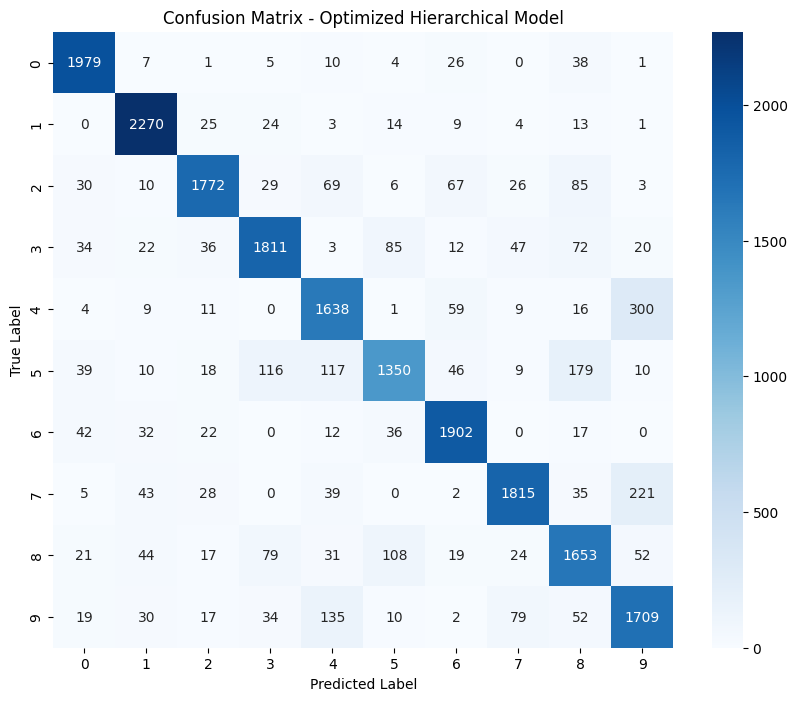

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#### To analyze results, plot the confusion matrix using the following command

#############################################################


######## Insert your code here                 ##############

# 1) Get predictions for the test dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2) Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 3) Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Optimized Hierarchical Model')
plt.show()
#############################################################



#############################################################


######## Interpret the obtained results        ##############


#############################################################